In [41]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
X,y = load_diabetes(return_X_y=True)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])


In [57]:

pipe.fit(X, y)
pred = pipe.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

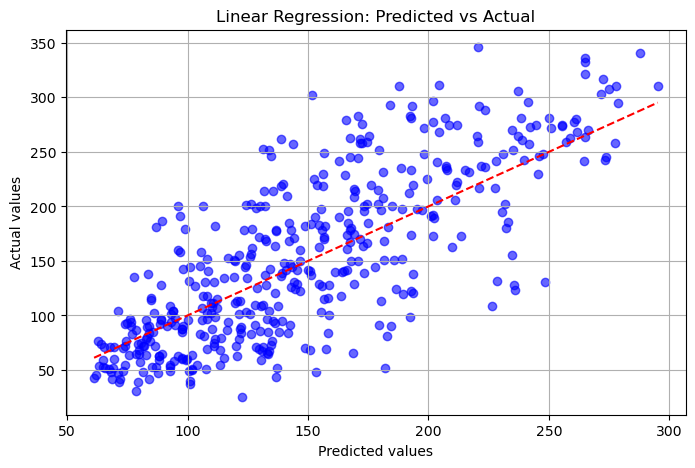

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(pred, y, alpha=0.6, color='blue')
plt.plot([min(pred), max(pred)], [min(pred), max(pred)], color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Linear Regression: Predicted vs Actual")
plt.grid(True)
plt.show

In [58]:
mod = GridSearchCV(estimator=pipe,
                   param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
                   cv=3)

In [59]:
mod.fit(X, y)
results_df = pd.DataFrame(mod.cv_results_)
results_df.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012081,0.008644,0.009012,0.002886,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.004981,0.000772,0.006487,0.001120,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.004440,0.000731,0.006014,0.001299,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.004028,0.000219,0.005664,0.000411,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.004257,0.000420,0.005590,0.000394,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
